# E-Commerce Text Classification

Project Description: E-commerce Text Classification

Data Description:

- This is the classification based E-commerce text dataset for 4 categories - "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.

- The dataset is in ".csv" format with two columns - the first column is the class name and the second one is the data point of that class. The data point is the product and description from the e-commerce website.

Dataset:

The dataset has the following features:

- Data Set Characteristics: Multivariate
- Number of Instances: 50424
- Number of classes: 4

In [2]:
# Import the libraries, load dataset
import numpy as np #Import numpy.
import pandas as pd #Import pandas.
import nltk #Import Natural Language Tool-Kit.

nltk.download('stopwords') #Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

!pip install contractions

import re, string, unicodedata  #Import Regex, string and unicodedata.
import contractions  #Import contractions library.
from bs4 import BeautifulSoup  #Import BeautifulSoup.

from nltk.corpus import stopwords #Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  #Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer  
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shril\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shril\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shril\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Loading data into pandas dataframe
data=pd.read_csv("ecommerce.csv")

In [4]:
print('Shape of data')
data.shape

Shape of data


(50424, 2)

In [5]:
data.head()

,Label,Text
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...
1,Household,Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100%..."
4,Household,Chef's Garage 2 Slot Edge Grip Kitchen Knife S...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50424 entries, 0 to 50423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   50424 non-null  object
 1   Text    50423 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


Text column has got object data type.

In [7]:
data['Text'].dtypes

dtype('O')

In [8]:
#Count of missing value across each column
data.isnull().sum()

Label    0
Text     1
dtype: int64

In [9]:
#Removal of missing value from the data
data = data.dropna() 

In [10]:
#Checking the missing value in each column
data.isnull().sum()

Label    0
Text     0
dtype: int64

In [11]:
# Unique product name in "Label" column.
data['Label'].unique()

array(['Household', 'Clothing & Accessories', 'Electronics', 'Books'],
      dtype=object)

In [12]:
#Saving Unique product name in "Label" column into a list.
labels = data['Label'].unique().tolist()
labels

['Household', 'Clothing & Accessories', 'Electronics', 'Books']

In [13]:
# Display full dataframe information (Non-turncated Text column.)
pd.set_option('display.max_colwidth', None) 
data.head()             

,Label,Text
0,Household,"Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they're leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: 45cm x 31cm x 175cm Weight: 2.4kg Material: steel Colour: white, black, or pink No. of hook: 7 + 3 (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories"
1,Household,"Cuisinart CCO-50BKN Deluxe Electric Can Opener, Black Size:None | Color Name:Black Style, convenience, and power come together in the Cuisinart electric can open. With chrome accents and elegant contours, it fits nicely with other modern countertop appliances. The easy single-touc"
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pack of 20 Anchor Penta 6 Amp 1 -Way Switch (White)- Pack of 20 comes with Spark Shield - Concealed Terminals - Silver Cadmium Contacts - IP 20 Protection - Captive Screw.
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100% Polyester High neck Wind Cheater with colour Blocked Detail"
4,Household,"Chef's Garage 2 Slot Edge Grip Kitchen Knife Sharpener, Helps to Sharpen The Dull Knives (Black) Chef's Garage Mini Knife sharpener helps to sharpen your dull knives. This tiny knife sharpener has 2 stage sharpening system. First stage is for damaged and dull knives, it will sharpen the knife on the coarse slot. The coarse slot is made of carbide. Second stage is fine slot, once you have honed the knife on coarse slot it will helps to give the finishing touch. The fine slot is made of ceramic for fine sharpening. It’s give a quick touch up on already sharper knives or for finishing off knives that have already passed through the coarse slot.Also it comes with one of the unique edge grip feature to sharpen on the edge of the table or counter top. Key Features: Very easy to use. Non-slip base for added stability and control Carbide and ceramic blades on these sharpening slots are long lasting. Strong and hard with flexibility of an edge grip feature for bigger knives Small in size 9.50 x 5.0 x 4.50 cms. Weights less - 70 grams Instructions:1. Insert the blade into the slot at a 90-degree angle to the mini sharpener.2. Place the edge in coarse slot (Black in color)3. Pull the knife straight back towards you 2 to 3 times while applying a light pressure.4. Place the blade in fine slot (White in color)5. Pull the knife straight back towards you 5 to 6 times while applying a heavy pressure.6. If blade is still dull repeat these steps until blade is sharp."


## Text pre-processing: Data preparation.
-Html tag removal.<br>
-Remove the numbers.<br>
-Tokenization.<br>
-Removal of Special Characters and Punctuations.<br>
-Conversion to lowercase.<br>
-Lemmatize or stemming.<br>
-Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)<br>

In [14]:
#HTML Tag Removal
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['Text'] = data['Text'].apply(lambda x: strip_html(x))
data.head()

,Label,Text
0,Household,"Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they're leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: 45cm x 31cm x 175cm Weight: 2.4kg Material: steel Colour: white, black, or pink No. of hook: 7 + 3 (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories"
1,Household,"Cuisinart CCO-50BKN Deluxe Electric Can Opener, Black Size:None | Color Name:Black Style, convenience, and power come together in the Cuisinart electric can open. With chrome accents and elegant contours, it fits nicely with other modern countertop appliances. The easy single-touc"
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pack of 20 Anchor Penta 6 Amp 1 -Way Switch (White)- Pack of 20 comes with Spark Shield - Concealed Terminals - Silver Cadmium Contacts - IP 20 Protection - Captive Screw.
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100% Polyester High neck Wind Cheater with colour Blocked Detail"
4,Household,"Chef's Garage 2 Slot Edge Grip Kitchen Knife Sharpener, Helps to Sharpen The Dull Knives (Black) Chef's Garage Mini Knife sharpener helps to sharpen your dull knives. This tiny knife sharpener has 2 stage sharpening system. First stage is for damaged and dull knives, it will sharpen the knife on the coarse slot. The coarse slot is made of carbide. Second stage is fine slot, once you have honed the knife on coarse slot it will helps to give the finishing touch. The fine slot is made of ceramic for fine sharpening. It’s give a quick touch up on already sharper knives or for finishing off knives that have already passed through the coarse slot.Also it comes with one of the unique edge grip feature to sharpen on the edge of the table or counter top. Key Features: Very easy to use. Non-slip base for added stability and control Carbide and ceramic blades on these sharpening slots are long lasting. Strong and hard with flexibility of an edge grip feature for bigger knives Small in size 9.50 x 5.0 x 4.50 cms. Weights less - 70 grams Instructions:1. Insert the blade into the slot at a 90-degree angle to the mini sharpener.2. Place the edge in coarse slot (Black in color)3. Pull the knife straight back towards you 2 to 3 times while applying a light pressure.4. Place the blade in fine slot (White in color)5. Pull the knife straight back towards you 5 to 6 times while applying a heavy pressure.6. If blade is still dull repeat these steps until blade is sharp."


In [15]:
#Remove the numbers
data1=data
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data1['Text'] = data1['Text'].apply(lambda x: remove_numbers(x))
data1.head()

,Label,Text
0,Household,"Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they're leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: cm x cm x cm Weight: .kg Material: steel Colour: white, black, or pink No. of hook: + (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories"
1,Household,"Cuisinart CCO-BKN Deluxe Electric Can Opener, Black Size:None | Color Name:Black Style, convenience, and power come together in the Cuisinart electric can open. With chrome accents and elegant contours, it fits nicely with other modern countertop appliances. The easy single-touc"
2,Household,Anchor Penta Amp -Way Switch (White) - Pack of Anchor Penta Amp -Way Switch (White)- Pack of comes with Spark Shield - Concealed Terminals - Silver Cadmium Contacts - IP Protection - Captive Screw.
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, % Polyester High neck Wind Cheater with colour Blocked Detail"
4,Household,"Chef's Garage Slot Edge Grip Kitchen Knife Sharpener, Helps to Sharpen The Dull Knives (Black) Chef's Garage Mini Knife sharpener helps to sharpen your dull knives. This tiny knife sharpener has stage sharpening system. First stage is for damaged and dull knives, it will sharpen the knife on the coarse slot. The coarse slot is made of carbide. Second stage is fine slot, once you have honed the knife on coarse slot it will helps to give the finishing touch. The fine slot is made of ceramic for fine sharpening. It’s give a quick touch up on already sharper knives or for finishing off knives that have already passed through the coarse slot.Also it comes with one of the unique edge grip feature to sharpen on the edge of the table or counter top. Key Features: Very easy to use. Non-slip base for added stability and control Carbide and ceramic blades on these sharpening slots are long lasting. Strong and hard with flexibility of an edge grip feature for bigger knives Small in size . x . x . cms. Weights less - grams Instructions:. Insert the blade into the slot at a -degree angle to the mini sharpener.. Place the edge in coarse slot (Black in color). Pull the knife straight back towards you to times while applying a light pressure.. Place the blade in fine slot (White in color). Pull the knife straight back towards you to times while applying a heavy pressure.. If blade is still dull repeat these steps until blade is sharp."


In [16]:
#Tokenization of data
data1['Text'] = data1.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1) 
data1.head()

,Label,Text
0,Household,"[Styleys, Wrought, Iron, Coat, Rack, Hanger, Creative, Fashion, Bedroom, for, Hanging, Clothes, Shelves, ,, Wrought, Iron, Racks, Standing, Coat, Rack, (, Black, ), Color, Name, :, Black, Styleys, Coat, Stand, is, great, for, homes, and, rooms, with, limited, space, ,, as, having, one, standing, rack, takes, up, less, space, compared, to, drawers, and, cupboards, ., Easy, for, guests, to, keep, their, items, ,, especially, bags, and, scarves, ,, when, visiting, ,, as, they, can, always, keep, an, eye, on, it, and, easily, grab, it, when, they, 're, leaving, ., Makes, a, smart, décor, piece, for, your, home, or, room, as, ...]"
1,Household,"[Cuisinart, CCO-BKN, Deluxe, Electric, Can, Opener, ,, Black, Size, :, None, |, Color, Name, :, Black, Style, ,, convenience, ,, and, power, come, together, in, the, Cuisinart, electric, can, open, ., With, chrome, accents, and, elegant, contours, ,, it, fits, nicely, with, other, modern, countertop, appliances, ., The, easy, single-touc]"
2,Household,"[Anchor, Penta, Amp, -Way, Switch, (, White, ), -, Pack, of, Anchor, Penta, Amp, -Way, Switch, (, White, ), -, Pack, of, comes, with, Spark, Shield, -, Concealed, Terminals, -, Silver, Cadmium, Contacts, -, IP, Protection, -, Captive, Screw, .]"
3,Clothing & Accessories,"[Proline, Men, 's, Track, Jacket, Proline, Woven, ,, %, Polyester, High, neck, Wind, Cheater, with, colour, Blocked, Detail]"
4,Household,"[Chef, 's, Garage, Slot, Edge, Grip, Kitchen, Knife, Sharpener, ,, Helps, to, Sharpen, The, Dull, Knives, (, Black, ), Chef, 's, Garage, Mini, Knife, sharpener, helps, to, sharpen, your, dull, knives, ., This, tiny, knife, sharpener, has, stage, sharpening, system, ., First, stage, is, for, damaged, and, dull, knives, ,, it, will, sharpen, the, knife, on, the, coarse, slot, ., The, coarse, slot, is, made, of, carbide, ., Second, stage, is, fine, slot, ,, once, you, have, honed, the, knife, on, coarse, slot, it, will, helps, to, give, the, finishing, touch, ., The, fine, slot, is, made, of, ceramic, for, ...]"


In [17]:
#Download Stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shril\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shril\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shril\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
stopwords = set(stopwords.words('english'))
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [19]:
def remove_non_ascii(words):
    #Remove non-ASCII characters from list of tokenized words
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    #Remove punctuation from list of tokenized words
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def to_lowercase(words):
    #Convert all characters to lowercase from list of tokenized words
    new_words = []                                  ## Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words      


def remove_stopwords(words):
    #Remove stop words from list of tokenized words
    new_words = []                                  # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words   

def stem_words(words):
    #Stem words in list of tokenized words
    stemmer = LancasterStemmer()
    stems = []                            # Create empty list to store pre-processed words.
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return stems


def lemmatize_list(words):
    #Lemmatize words in list of tokenized words
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word)
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas


def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = stem_words(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data1['Text'] = data1.apply(lambda row: normalize(row['Text']), axis=1)
data1.head()    

,Label,Text
0,Household,styley wrought iron coat rack hang cre fash bedroom hang cloth shelv wrought iron rack stand coat rack black col nam black styley coat stand gre hom room limit spac on stand rack tak le spac comp draw cupboard easy guest keep item espec bag scarv visit alway keep ey easy grab leav mak smart dec piec hom room occupy stand show styl handb access hangm achiev med dimend cm x cm x cm weight kg mat steel colo whit black pink hook straight peg suit hang coat cloth scarv handb hat access
1,Household,cuisinart ccobkn delux elect op black siz non col nam black styl conveny pow com togeth cuisinart elect op chrome acc eleg conto fit nic modern countertop apply easy singletouc
2,Household,anch pent amp way switch whit pack anch pent amp way switch whit pack com spark shield cont termin silv cadm contact ip protect capt screw
3,Clothing & Accessories,prolin men track jacket prolin wov polyest high neck wind che colo block detail
4,Household,chef gar slot edg grip kitch knif sharp help sharp dul kniv black chef gar min knif sharp help sharp dul kniv tiny knif sharp stag sharp system first stag dam dul kniv sharp knif coars slot coars slot mad carbid second stag fin slot hon knif coars slot help giv fin touch fin slot mad ceram fin sharp giv quick touch already sharp kniv fin kniv already pas coars slotalso com on un edg grip feat sharp edg tabl count top key feat easy u nonslip ba ad stabl control carbid ceram blad sharp slot long last strong hard flex edg grip feat big kniv smal siz x x cm weight le gram instruct insert blad slot degr angl min sharp plac edg coars slot black col pul knif straight back toward tim apply light press plac blad fin slot whit col pul knif straight back toward tim apply heavy press blad stil dul rep step blad sharp


In [20]:
#Vectorization - CountVectorization
#Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)                # Keep only 5000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(data1['Text'])

data_features = data_features.toarray()  

In [21]:
data_features.shape

(50423, 1000)

In [23]:
X = data_features
y = data.Label

## Model Building

In [24]:
# Split data into training and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Categories classification based on CountVectorizer

In [25]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)
print(forest)

RandomForestClassifier(n_estimators=10, n_jobs=4)


In [26]:
print(np.mean(cross_val_score(forest, X, y, cv=10)))

0.9691212494404529


In [27]:
# Predict the result for test data using the model built above.
result = forest.predict(X_test)

[[3461   12   23   94]
 [  22 2508   12   54]
 [  31   12 2982  142]
 [  73   61   77 5563]]


<Axes: xlabel='None', ylabel='None'>

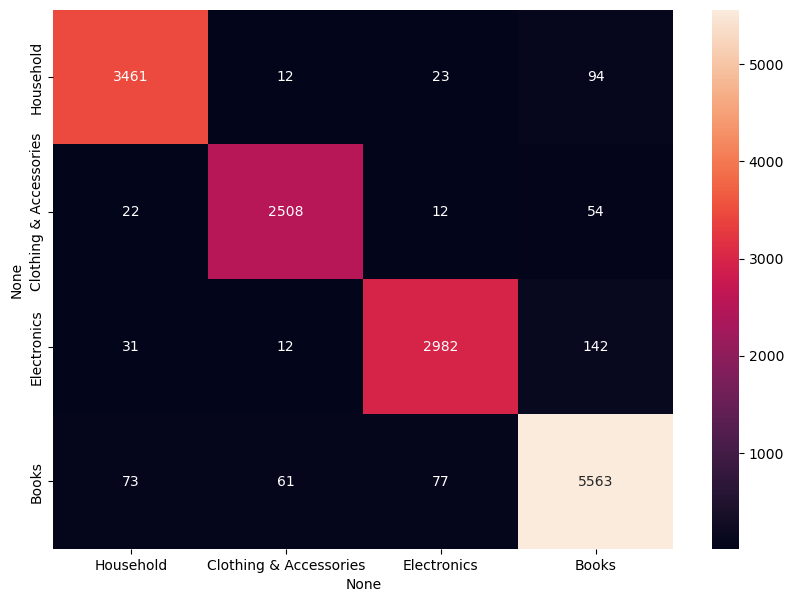

In [28]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)
print(conf_mat)
df_cm = pd.DataFrame(conf_mat, index = [i for i in [labels]],
                  columns = [i for i in [labels]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Vectorization-TfidfVectorizer

In [29]:
# Using TfidfVectorizer to convert text data to numbers.
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
data_features = vectorizer.fit_transform(data['Text'])
data_features = data_features.toarray()
data_features.shape

(50423, 1000)

In [30]:
# Split data into training and testing set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Categories Classification base on TfidfVectorizer

In [31]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)
print(forest)
print(np.mean(cross_val_score(forest, X, y, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.9686847966669505


In [33]:
result = forest.predict(X_test)

[[3469   17   21   83]
 [  24 2519    6   47]
 [  35   12 2990  130]
 [  72   54   71 5577]]


<Axes: xlabel='None', ylabel='None'>

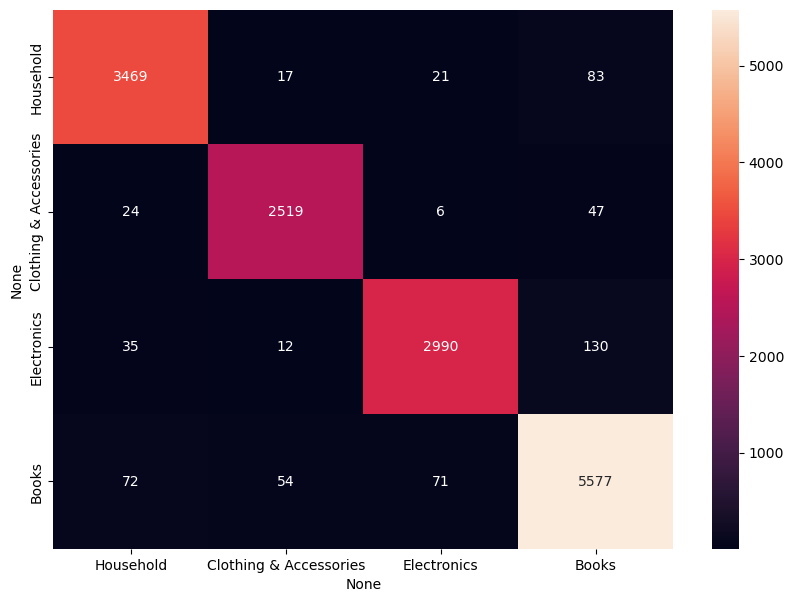

In [34]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in [labels]],
                  columns = [i for i in [labels]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

**Summary:**

- We used E-commerce text dataset for 4 categories - "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.
- The goal was to build a model for categories-classification.
- We Pre-processed the data using variuos techniques and libraries.
- The pre-precessed data is converted to vectorer(representation into number), so that we can feed the data in the model.
- After building the classification model, we predicted the result for the test data.
- After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
- One more way to increase accuracy is to use different variations of Pre-processing techniques
- we can optimize the parameter of vectorizer to improve our outcome.
- Over all, we have got very good accuracy(97% on both vectorizer) after applying all necessary model building process.